In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv("wine_data (1).csv" , header=None , usecols= [0 , 1 , 2 ] )

In [3]:
data.columns = ['class_label' ,'Alcohol' , 'Malic_Acide']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class_label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic_Acide  178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [5]:
data.head()

,class_label,Alcohol,Malic_Acide
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [6]:
data.describe()

,class_label,Alcohol,Malic_Acide
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


In [12]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [8]:
data.isnull().sum()

class_label    0
Alcohol        0
Malic_Acide    0
dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11484\3366068428.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Alcohol'], shade=True, color='r')


<Axes: xlabel='Alcohol', ylabel='Density'>

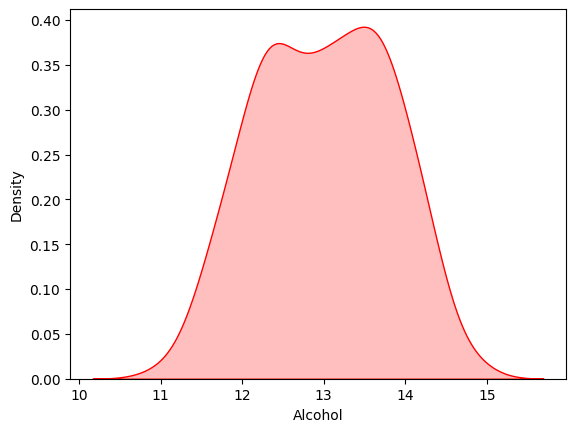

In [9]:
sns.kdeplot(data['Alcohol'], shade=True, color='r')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11484\3814712324.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Malic_Acide'], shade=True, color='b')


<Axes: xlabel='Malic_Acide', ylabel='Density'>

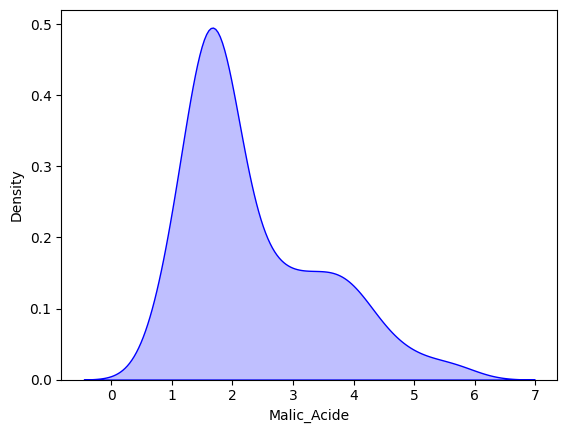

In [10]:
sns.kdeplot(data['Malic_Acide'], shade=True, color='b')

<Axes: xlabel='Alcohol', ylabel='Malic_Acide'>

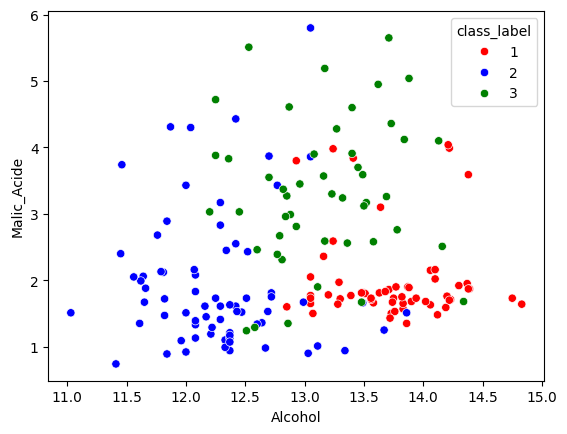

In [13]:
color_dict = {1: "red", 2: "blue", 3: "green"}
sns.scatterplot(x=data["Alcohol"], y=data["Malic_Acide"], hue=data["class_label"], palette=color_dict)

In [14]:
x = data.drop("class_label", axis=1)
y = data['class_label']

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [16]:
print(x_train.shape , y_train.shape)

(142, 2) (142,)


In [17]:
print(x_test.shape , y_test.shape)

(36, 2) (36,)


In [19]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [20]:
scaler.fit(x_train)

MinMaxScaler()

In [21]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_test.columns)

In [25]:
np.round(x_train.describe() , 2)

,Alcohol,Malic_Acide
count,142.00,142.00
mean,12.98,2.37
std,0.82,1.14
min,11.03,0.89
25%,12.33,1.62
50%,13.01,1.88
75%,13.68,3.14
max,14.83,5.80


In [26]:
np.round(x_train_scaled.describe() , 2)

,Alcohol,Malic_Acide
count,142.00,142.00
mean,0.51,0.30
std,0.22,0.23
min,0.00,0.00
25%,0.34,0.15
50%,0.52,0.20
75%,0.70,0.46
max,1.00,1.00


Text(0.5, 1.0, 'after normalization')

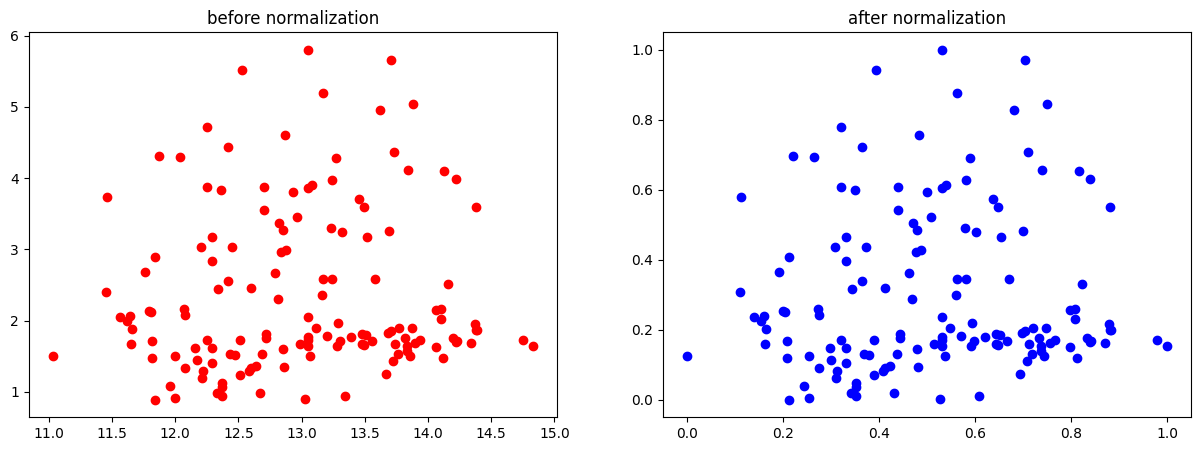

In [29]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (15 , 5))
ax1.scatter(x_train['Alcohol'] , x_train['Malic_Acide'] , color = 'red')
ax1.set_title("before normalization")

ax2.scatter(x_train_scaled['Alcohol'] , x_train_scaled['Malic_Acide'], color = 'blue')
ax2.set_title("after normalization")

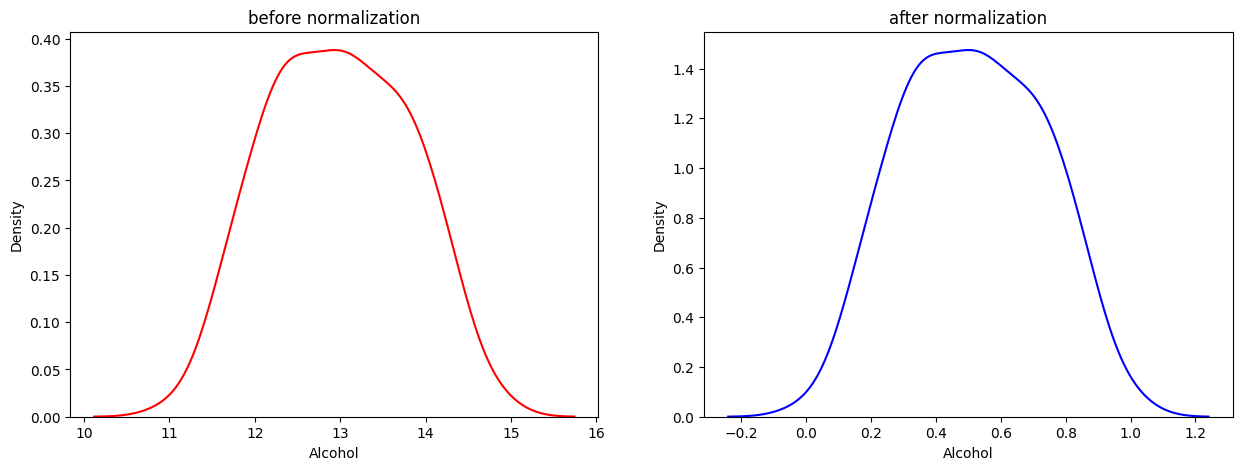

In [31]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (15 , 5))

ax1.set_title("before normalization")
sns.kdeplot(x_train['Alcohol'] , ax = ax1 , color = 'red')

ax2.set_title("after normalization")
sns.kdeplot(x_train_scaled['Alcohol'] , ax = ax2 , color = 'blue')
plt.show()